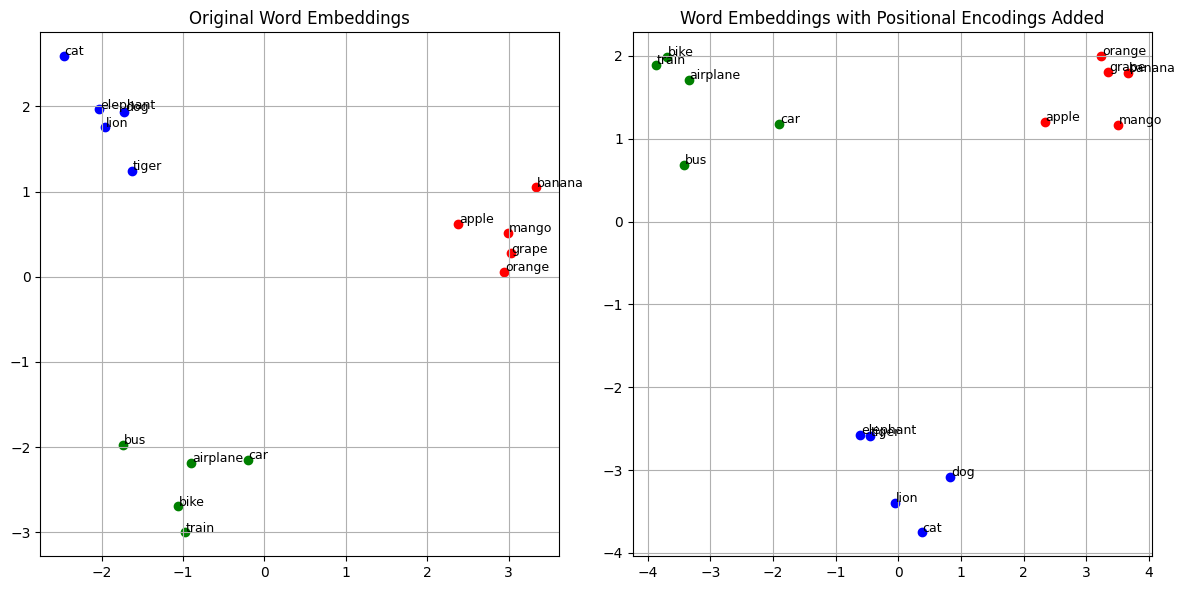

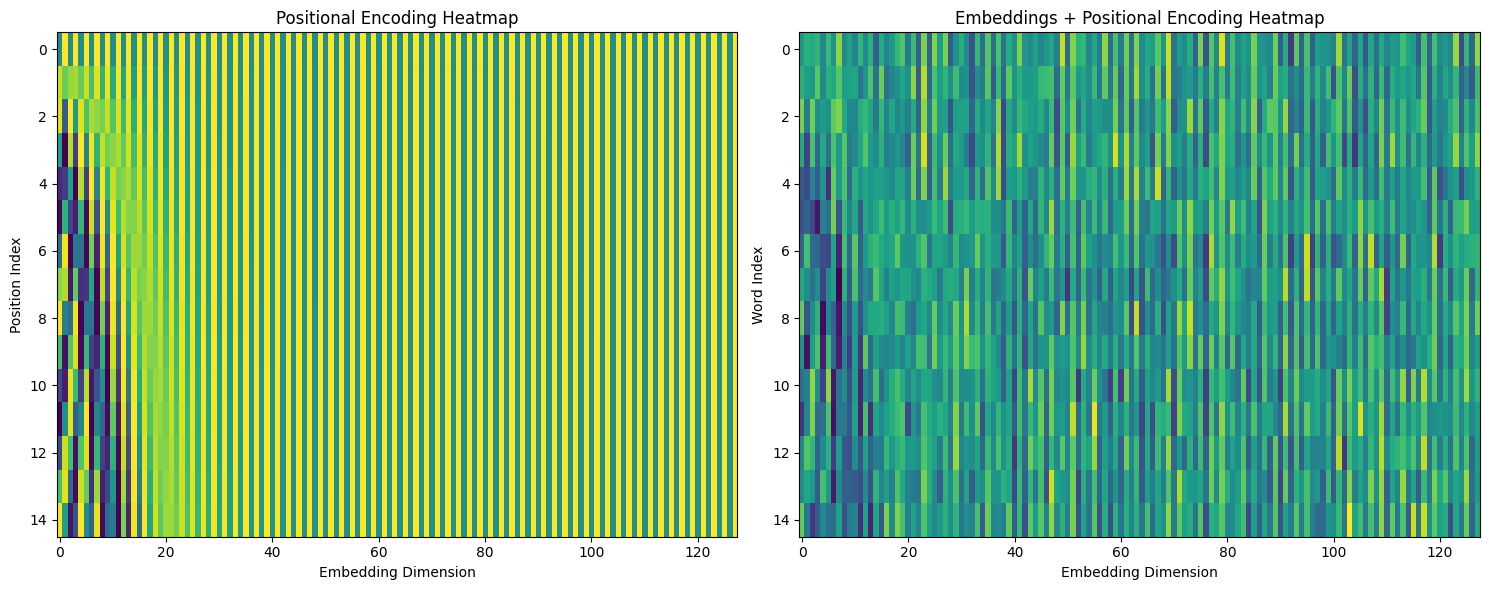

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate some meaningful word embeddings
# For simplicity, we will simulate embeddings for related words using clusters
word_categories = {
    "fruit": ["apple", "banana", "orange", "grape", "mango"],
    "animal": ["dog", "cat", "lion", "tiger", "elephant"],
    "vehicle": ["car", "bus", "bike", "train", "airplane"],
}
word_embeddings = {}

# Create embeddings: each category forms a cluster
for category, words in word_categories.items():
    cluster_center = np.random.rand(128)  # Cluster center for the category
    for word in words:
        word_embeddings[word] = cluster_center + np.random.normal(0, 0.3, 128)  # Small random noise

# Positional Encoding (fixed for this example)
def generate_positional_encoding(seq_len, dim):
    pe = np.zeros((seq_len, dim))
    for pos in range(seq_len):
        for i in range(0, dim, 2):
            pe[pos, i] = np.sin(pos / (10000 ** (2 * i / dim)))
            if i + 1 < dim:
                pe[pos, i + 1] = np.cos(pos / (10000 ** (2 * i / dim)))
    return pe

# Generate positional encodings for the same length as our words
seq_len = len(word_embeddings)
dim = 128
positional_encoding = generate_positional_encoding(seq_len, dim)

# Add positional encodings to word embeddings
words = list(word_embeddings.keys())
combined_embeddings = {}
for i, word in enumerate(words):
    combined_embeddings[word] = word_embeddings[word] + positional_encoding[i]

# Visualization: Reduce dimensions to 2D using PCA and plot
def plot_embeddings_side_by_side_with_colors(embeddings1, title1, embeddings2, title2, categories):
    words1 = list(embeddings1.keys())
    vectors1 = np.array(list(embeddings1.values()))
    words2 = list(embeddings2.keys())
    vectors2 = np.array(list(embeddings2.values()))

    pca1 = PCA(n_components=2)
    reduced_vectors1 = pca1.fit_transform(vectors1)

    pca2 = PCA(n_components=2)
    reduced_vectors2 = pca2.fit_transform(vectors2)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Assign colors to categories
    category_colors = {
        "fruit": "red",
        "animal": "blue",
        "vehicle": "green",
    }

    # Plot for embeddings1
    for word in words1:
        category = next(key for key, val in categories.items() if word in val)
        color = category_colors[category]
        idx = words1.index(word)
        axes[0].scatter(reduced_vectors1[idx, 0], reduced_vectors1[idx, 1], color=color, label=category)
        axes[0].text(reduced_vectors1[idx, 0] + 0.01, reduced_vectors1[idx, 1] + 0.01, word, fontsize=9)
    axes[0].set_title(title1)
    axes[0].grid()

    # Plot for embeddings2
    for word in words2:
        category = next(key for key, val in categories.items() if word in val)
        color = category_colors[category]
        idx = words2.index(word)
        axes[1].scatter(reduced_vectors2[idx, 0], reduced_vectors2[idx, 1], color=color, label=category)
        axes[1].text(reduced_vectors2[idx, 0] + 0.01, reduced_vectors2[idx, 1] + 0.01, word, fontsize=9)
    axes[1].set_title(title2)
    axes[1].grid()

    plt.tight_layout()
    plt.show()


# Plot both embeddings side by side with category colors
plot_embeddings_side_by_side_with_colors(
    word_embeddings, "Original Word Embeddings",
    combined_embeddings, "Word Embeddings with Positional Encodings Added",
    word_categories
)

     


import numpy as np
import matplotlib.pyplot as plt

# Generate some meaningful word embeddings
# For simplicity, we will simulate embeddings for related words using clusters
word_categories = {
    "fruit": ["apple", "banana", "orange", "grape", "mango"],
    "animal": ["dog", "cat", "lion", "tiger", "elephant"],
    "vehicle": ["car", "bus", "bike", "train", "airplane"],
}
word_embeddings = {}

# Create embeddings: each category forms a cluster
for category, words in word_categories.items():
    cluster_center = np.random.rand(128)  # Cluster center for the category
    for word in words:
        word_embeddings[word] = cluster_center + np.random.normal(0, 0.3, 128)  # Small random noise

# Positional Encoding (fixed for this example)
def generate_positional_encoding(seq_len, dim):
    pe = np.zeros((seq_len, dim))
    for pos in range(seq_len):
        for i in range(0, dim, 2):
            pe[pos, i] = np.sin(pos / (10000 ** (2 * i / dim)))
            if i + 1 < dim:
                pe[pos, i + 1] = np.cos(pos / (10000 ** (2 * i / dim)))
    return pe

# Generate positional encodings for the same length as our words
seq_len = len(word_embeddings)
dim = 128
positional_encoding = generate_positional_encoding(seq_len, dim)

# Add positional encodings to word embeddings
words = list(word_embeddings.keys())
combined_embeddings = {}
for i, word in enumerate(words):
    combined_embeddings[word] = word_embeddings[word] + positional_encoding[i]

# Visualization: Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for Positional Encoding
axes[0].imshow(positional_encoding, aspect='auto', cmap='viridis')
axes[0].set_title('Positional Encoding Heatmap')
axes[0].set_xlabel('Embedding Dimension')
axes[0].set_ylabel('Position Index')

# Heatmap for Combined Embeddings
combined_matrix = np.array([combined_embeddings[word] for word in words])
axes[1].imshow(combined_matrix, aspect='auto', cmap='viridis')
axes[1].set_title('Embeddings + Positional Encoding Heatmap')
axes[1].set_xlabel('Embedding Dimension')
axes[1].set_ylabel('Word Index')

plt.tight_layout()
plt.show()

     



     